In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

In [3]:
df_store = pd.read_csv(r'C:\Users\1234\Downloads\archive (3)\stores.csv')

In [4]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
df_train = pd.read_csv(r'C:\Users\1234\Downloads\archive (3)\train.csv')

In [6]:
df_feature = pd.read_csv(r'C:\Users\1234\Downloads\archive (3)\features.csv')

In [7]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
df_train.shape

(421570, 5)

In [9]:
df_feature.shape

(8190, 12)

In [10]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [8]:
df_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [9]:
df = df_train.merge(df_feature, on = ['Store','Date'],how = 'inner').merge(df_store, on= ['Store'],how = 'inner')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [10]:
df.drop(['IsHoliday_y'],axis = 1,inplace = True)
df.rename(columns = {'IsHoliday_x': 'IsHoliday'},inplace = True)

In [11]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [12]:
df['Store'].nunique()

45

In [13]:
df['Dept'].nunique()

81

In [14]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
store_dept_table.head()

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN


In [15]:
df.loc[df['Weekly_Sales']<0]


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315
4419,1,47,2011-04-08,-298.00,False,67.84,3.622,NaN,NaN,NaN,NaN,NaN,215.074394,7.682,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419999,45,49,2012-05-18,-3.97,False,66.30,3.848,6813.74,NaN,13.86,936.49,2941.55,190.996448,8.567,B,118221
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221


In [16]:
df = df.loc[df['Weekly_Sales']>0]
df.shape

(420212, 16)

In [17]:
df['IsHoliday'].unique()

array([False,  True])

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

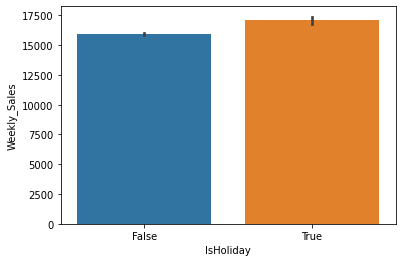

In [18]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)

In [19]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [20]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique()

133

In [21]:
store_avg_sales = df.groupby(['Store'])['Weekly_Sales'].mean()

In [22]:
store_avg_sales

Store
1     21749.145978
2     26961.734433
3      6380.226664
4     29175.540012
5      5065.283995
6     21960.799719
7      8379.492279
8     13148.994199
9      8805.882422
10    26474.084736
11    19332.641482
12    14929.244341
13    27399.631860
14    28885.743572
15     9045.551883
16     7897.132309
17    13023.154252
18    15820.075220
19    20430.857011
20    29627.580994
21    11328.537256
22    15247.436339
23    19839.563326
24    19002.604957
25    10346.216563
26    14568.937406
27    24897.723614
28    18741.608875
29     8185.783800
30     8785.125694
31    19761.897868
32    16403.222829
33     5736.388608
34    13546.210778
35    13989.575528
36     8619.227546
37    10308.816413
38     7503.727479
39    21084.103489
40    13783.028706
41    18031.506002
42    11519.913664
43    13463.138546
44     6061.841438
45    11695.871003
Name: Weekly_Sales, dtype: float64

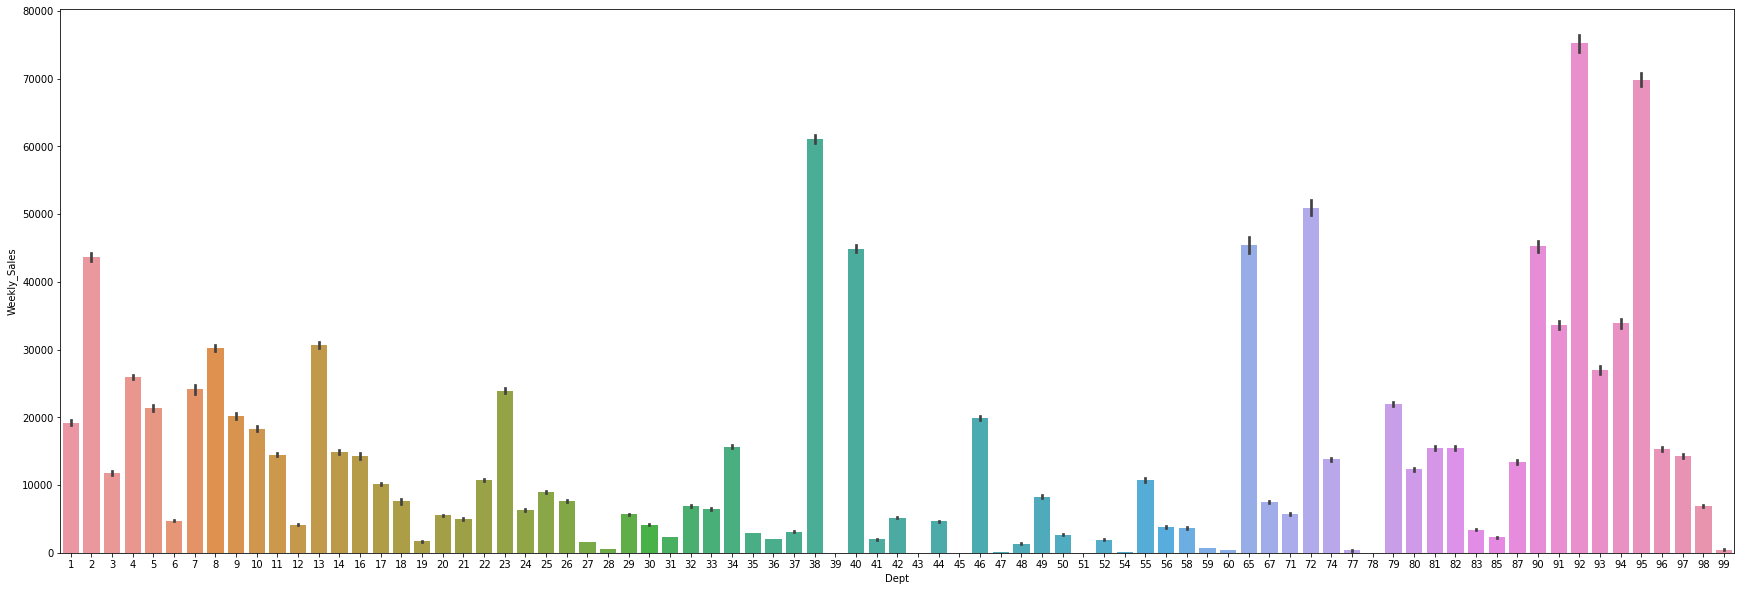

In [23]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x = 'Dept', y = 'Weekly_Sales', data = df)

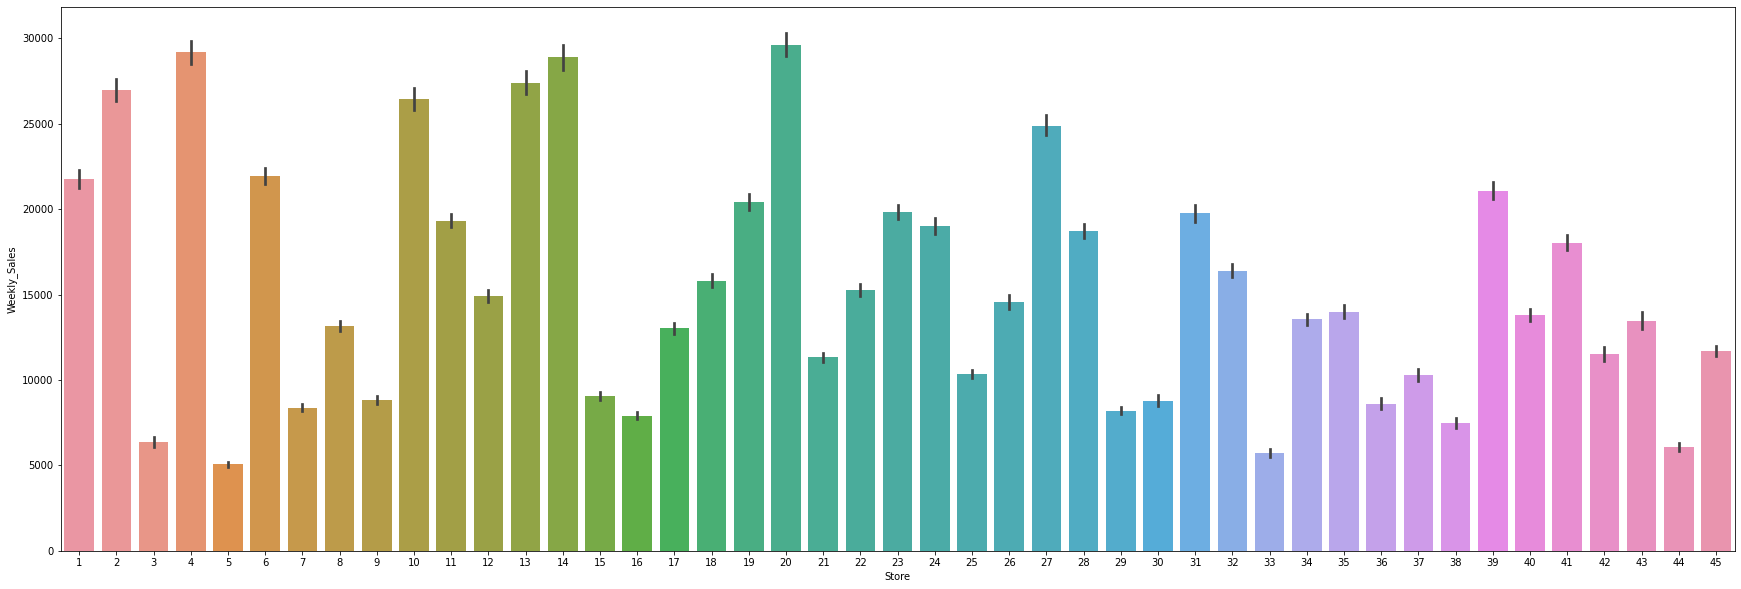

In [24]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x = 'Store', y = 'Weekly_Sales', data = df)

In [25]:
import math
from datetime import datetime
from datetime import timedelta

In [26]:
df['Date'] = pd.to_datetime(df['Date'])
df['week'] = df['Date'].dt.week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

C:\Users\1234\AppData\Local\Temp\ipykernel_7636\3805031148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\1234\AppData\Local\Temp\ipykernel_7636\3805031148.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['Date'].dt.week
C:\Users\1234\AppData\Local\Temp\ipykernel_7636\3805031148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df['Date'].d

In [27]:
df.groupby('month')['Weekly_Sales'].mean()

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [28]:
df.groupby('year')['Weekly_Sales'].mean()

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='month'>

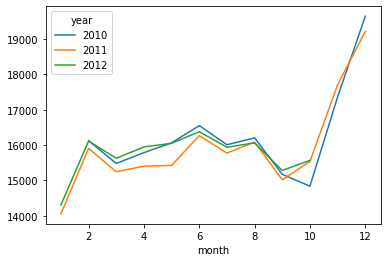

In [29]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

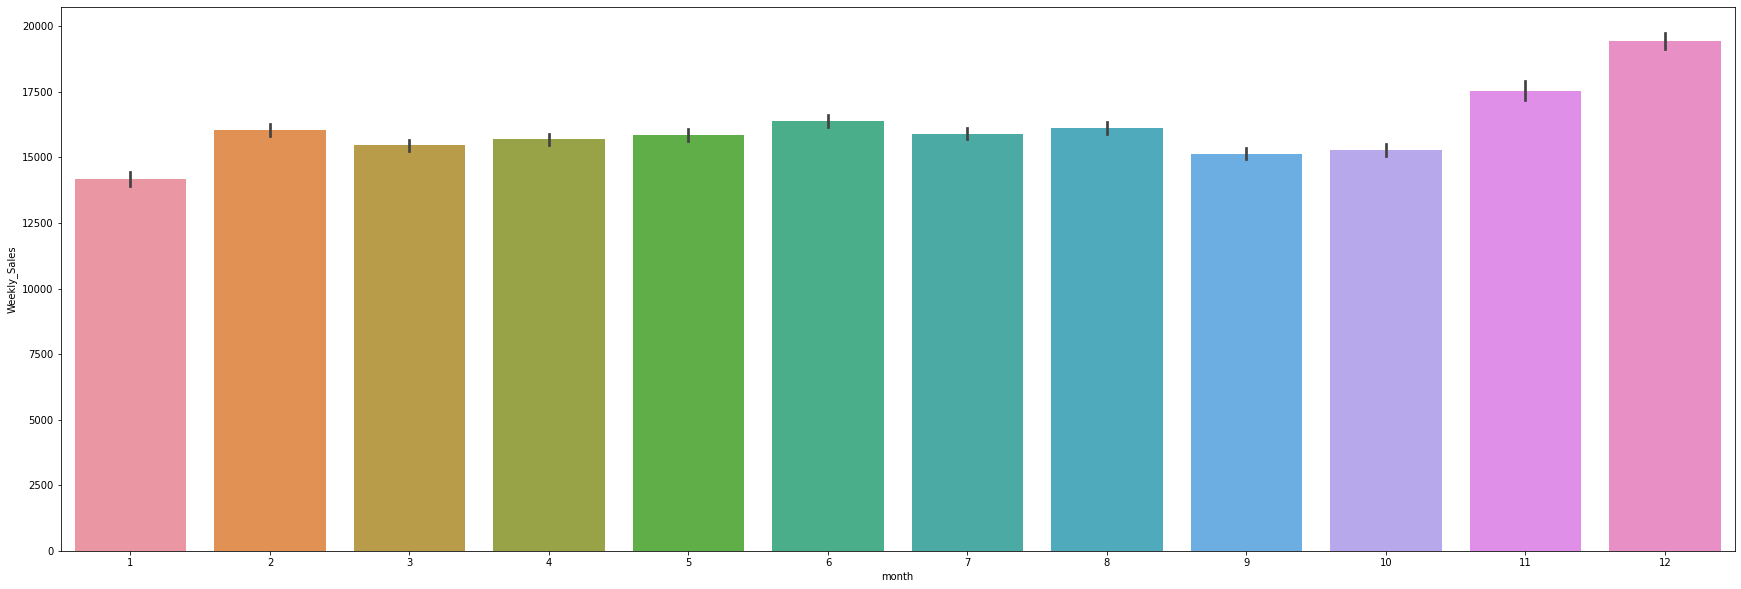

In [30]:
plt.figure(figsize= (30,10))
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)

In [31]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='week'>

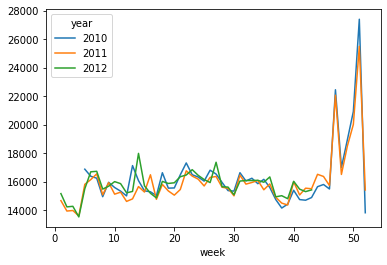

In [32]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

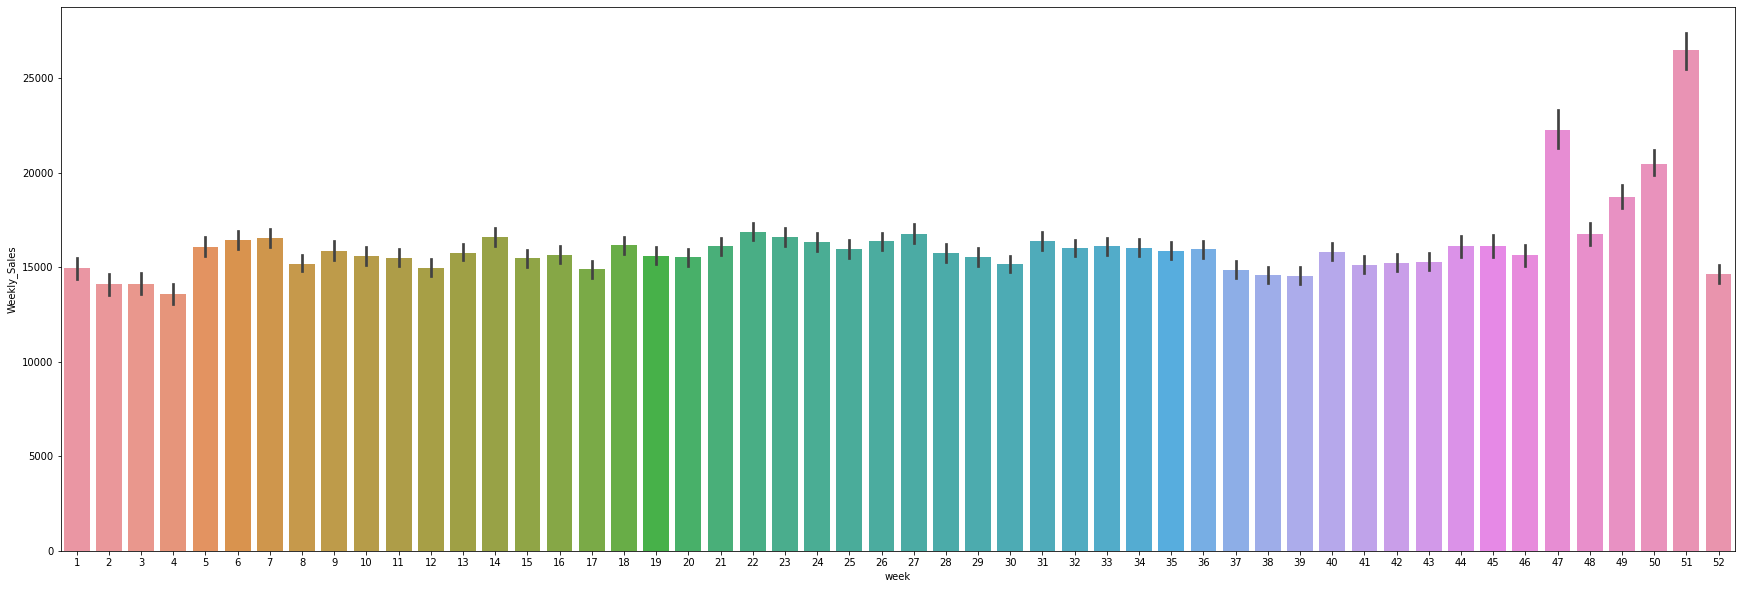

In [33]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

<AxesSubplot:xlabel='Fuel_Price'>

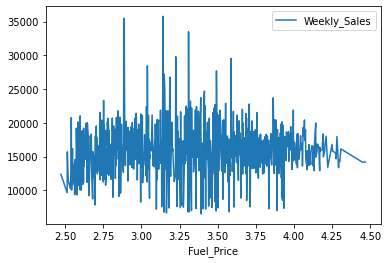

In [34]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<AxesSubplot:xlabel='Temperature'>

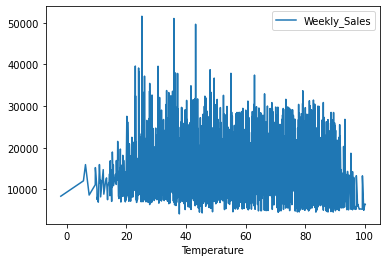

In [35]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<AxesSubplot:xlabel='CPI'>

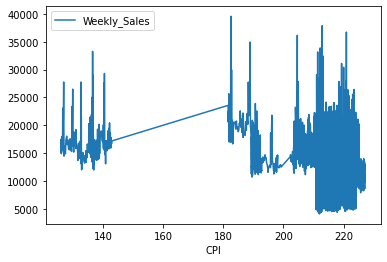

In [36]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<AxesSubplot:xlabel='Unemployment'>

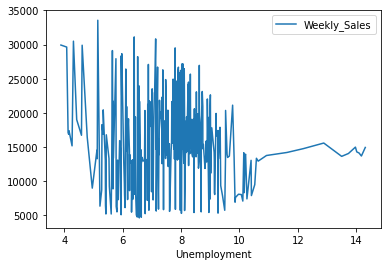

In [37]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

In [38]:
df_encoded = df.copy()

In [39]:
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int)

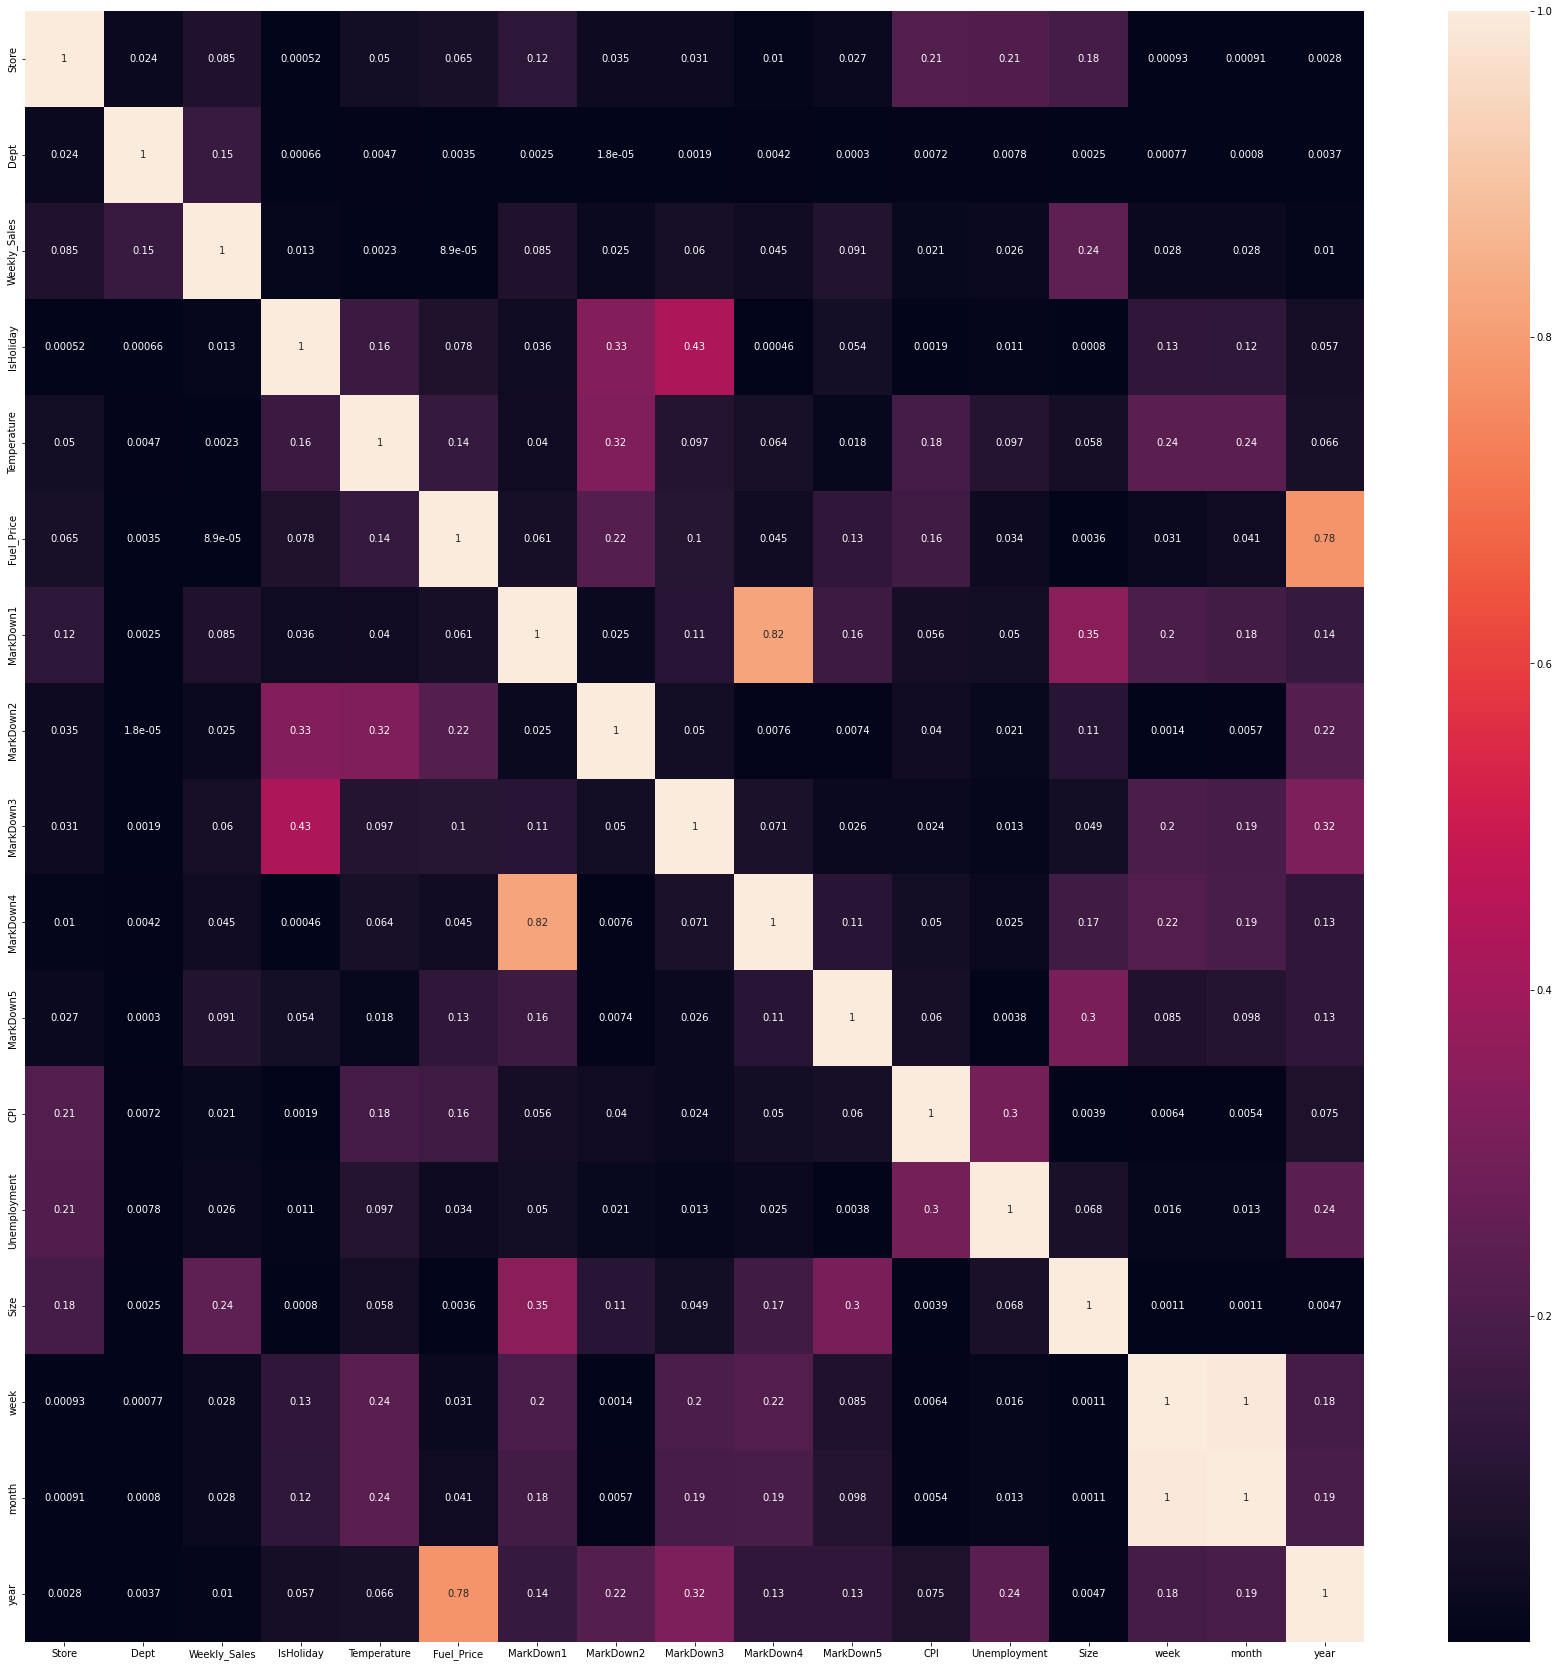

In [40]:
plt.figure(figsize = (30,30))
sns.heatmap(df_encoded.corr().abs(),annot = True)    # To see the correlations
plt.show()

In [41]:
df_encoded.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
Store,1.000000,0.024258,-0.085117,-0.000522,-0.050230,0.065321,-0.119676,-0.034993,-0.031475,-0.009991,-0.026777,-0.211261,0.208759,-0.182763,0.000926,0.000907,0.002831
Dept,0.024258,1.000000,0.148749,0.000663,0.004727,0.003544,-0.002512,0.000018,0.001855,0.004176,0.000295,-0.007178,0.007787,-0.002491,0.000767,0.000800,0.003716
Weekly_Sales,-0.085117,0.148749,1.000000,0.012843,-0.002339,0.000089,0.085325,0.024565,0.060304,0.045325,0.090561,-0.021162,-0.025806,0.244117,0.027659,0.028401,-0.010015
IsHoliday,-0.000522,0.000663,0.012843,1.000000,-0.155775,-0.078155,-0.035632,0.334327,0.428364,-0.000459,-0.053696,-0.001933,0.010555,0.000797,0.127846,0.123058,-0.056572
Temperature,-0.050230,0.004727,-0.002339,-0.155775,1.000000,0.143700,-0.040498,-0.323891,-0.096843,-0.063955,-0.017616,0.182223,0.096768,-0.058413,0.236256,0.235957,0.065712
Fuel_Price,0.065321,0.003544,0.000089,-0.078155,0.143700,1.000000,0.061302,-0.220680,-0.102146,-0.045033,-0.128017,-0.164199,-0.033915,0.003632,-0.031191,-0.040931,0.779681
MarkDown1,-0.119676,-0.002512,0.085325,-0.035632,-0.040498,0.061302,1.000000,0.024601,-0.108189,0.819175,0.160412,-0.055522,0.050103,0.345732,-0.198172,-0.176272,0.141412
MarkDown2,-0.034993,0.000018,0.024565,0.334327,-0.323891,-0.220680,0.024601,1.000000,-0.050146,-0.007582,-0.007410,-0.039782,0.020839,0.108843,-0.001425,-0.005719,-0.221755
MarkDown3,-0.031475,0.001855,0.060304,0.428364,-0.096843,-0.102146,-0.108189,-0.050146,1.000000,-0.071148,-0.026475,-0.023820,0.012866,0.048935,0.196423,0.187978,-0.319366
MarkDown4,-0.009991,0.004176,0.045325,-0.000459,-0.063955,-0.045033,0.819175,-0.007582,-0.071148,1.000000,0.107895,-0.049693,0.024919,0.168266,-0.218534,-0.194908,0.126455


In [42]:
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment']
df_encoded.drop(drop_col, axis=1, inplace=True)

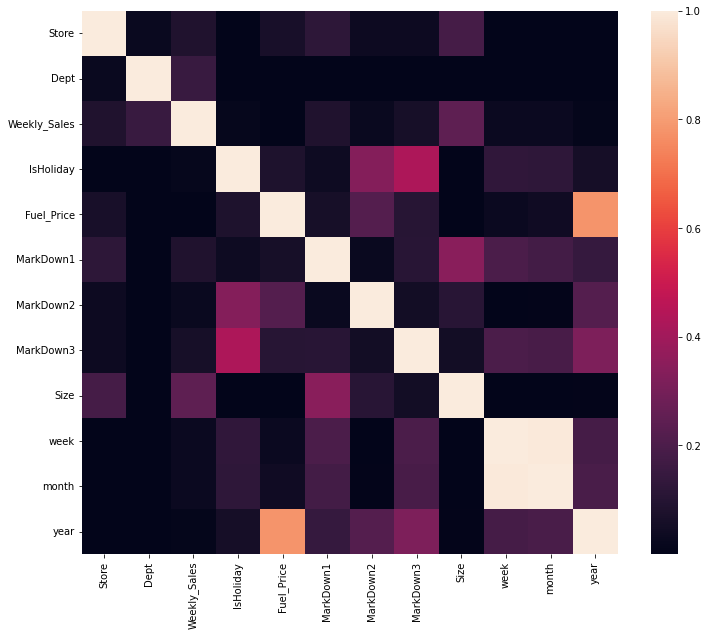

In [43]:
plt.figure(figsize = (12,10))
sns.heatmap(df_encoded.corr().abs())    # To see the correlations without dropping columns
plt.show()

In [44]:
 df_encoded = df_encoded.fillna(0)

In [45]:
 df_encoded

,Store,Dept,Date,Weekly_Sales,IsHoliday,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,0,2.572,0.00,0.00,0.0,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,0,2.572,0.00,0.00,0.0,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,0,2.572,0.00,0.00,0.0,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,0,2.572,0.00,0.00,0.0,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,0,2.572,0.00,0.00,0.0,A,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,3.882,4018.91,58.08,100.0,B,118221,43,10,2012
421566,45,94,2012-10-26,5203.31,0,3.882,4018.91,58.08,100.0,B,118221,43,10,2012
421567,45,95,2012-10-26,56017.47,0,3.882,4018.91,58.08,100.0,B,118221,43,10,2012
421568,45,97,2012-10-26,6817.48,0,3.882,4018.91,58.08,100.0,B,118221,43,10,2012


In [46]:
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
df_encoded['Type'] = df_encoded['Type'].replace(type_group)

In [47]:
df_encoded

,Store,Dept,Date,Weekly_Sales,IsHoliday,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,Type,Size,week,month,year
0,1,1,2010-02-05,24924.50,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
1,1,2,2010-02-05,50605.27,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
2,1,3,2010-02-05,13740.12,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
3,1,4,2010-02-05,39954.04,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
4,1,5,2010-02-05,32229.38,0,2.572,0.00,0.00,0.0,1,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,3.882,4018.91,58.08,100.0,2,118221,43,10,2012
421566,45,94,2012-10-26,5203.31,0,3.882,4018.91,58.08,100.0,2,118221,43,10,2012
421567,45,95,2012-10-26,56017.47,0,3.882,4018.91,58.08,100.0,2,118221,43,10,2012
421568,45,97,2012-10-26,6817.48,0,3.882,4018.91,58.08,100.0,2,118221,43,10,2012


In [48]:
df_encoded.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'Type', 'Size', 'week', 'month',
       'year'],
      dtype='object')

In [49]:
target = "Weekly_Sales"
used_cols = [c for c in df_encoded.columns.to_list() if c not in [target]] 

In [50]:

X = df_encoded[used_cols]
y = df_encoded[target]

In [51]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [52]:
x_train.shape

(294148, 13)

In [53]:
y_train.shape

(294148,)

In [54]:
x_train = x_train.drop(['Date'], axis=1) # dropping date from train
x_test = x_test.drop(['Date'], axis=1) # dropping date from test

In [55]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()

In [58]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

In [59]:
pipe = make_pipeline(sc,rf)

In [60]:
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)

In [61]:
y_test.shape

(126064,)

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.8281003959053675

In [63]:
r2_score(y_train, y_pred)

0.9003688767621311

In [84]:
accuracy = cross_val_score(estimator = rf,X = x_train, y = y_train,cv=10)

In [85]:
print("Accuracy: {:.2f} %".format(accuracy.mean()*100))

Accuracy: 82.84 %
